In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
#permite que los gráficos generados por la biblioteca matplotlib se muestren directamente en el notebook, incrustados en la celda de salida.
%matplotlib inline

# crea imagenes de alta resolución
%config InlineBackend.figure_format = "retina"
# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
plt.rcParams["figure.dpi"] = 96

In [2]:
try:
    import google.colab
    !curl -L -o coffees.csv 'https://github.com/daniopitz/visualizacion/raw/main/clases_practicas/data/coffees.csv'
except Exception as e:
    print(f"Error: {e}")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23050  100 23050    0     0  55231      0 --:--:-- --:--:-- --:--:-- 55231


Leemos el archivo

# Parte 1

In [3]:
df=pd.read_csv('coffees.csv')
df

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
...,...,...,...
666,2013-03-12 08:28:00,18235.0,Sergio
667,2013-04-05 11:20:00,18942.0,Sergio
668,2013-04-27 11:04:00,19698.0,Sergio
669,2013-09-12 15:38:00,24450.0,Quentin


In [4]:
# Convertir la columna a fecha
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')


In [5]:
df.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [6]:
df.fillna(0, inplace=True)

Vamos a eliminar las filas de testeo, se puede reemplazar por 0 también.

In [7]:
df_filtered=df[df['coffees']!='testing']


In [8]:
df_filtered['coffees']=df_filtered['coffees'].astype(float)
df_filtered['coffees']

<ipython-input-8-3c26b1da0151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['coffees']=df_filtered['coffees'].astype(float)


0        397.0
1        410.0
3          0.0
4        464.0
5        481.0
        ...   
666    18235.0
667    18942.0
668    19698.0
669    24450.0
670    24463.0
Name: coffees, Length: 670, dtype: float64

Agrupamos por personas o contributor

In [9]:
df_gr=df_filtered.groupby(['contributor'])['coffees'].sum().reset_index()
df_gr

,contributor,coffees
0,Anthony,3291.0
1,Arturo,2895.0
2,Ben,2460.0
3,Colm,66481.0
4,Mike,1409834.0
5,Mike M,35185.0
6,Quentin,3251384.0
7,Sergio,842156.0
8,Stefano,15800.0


In [10]:
df_gr.columns = ['name', 'coffee_count']
df_gr

,name,coffee_count
0,Anthony,3291.0
1,Arturo,2895.0
2,Ben,2460.0
3,Colm,66481.0
4,Mike,1409834.0
5,Mike M,35185.0
6,Quentin,3251384.0
7,Sergio,842156.0
8,Stefano,15800.0


In [11]:

df_gr_sorted = df_gr.sort_values(by='coffee_count', ascending=False)
df_gr_sorted

,name,coffee_count
6,Quentin,3251384.0
4,Mike,1409834.0
7,Sergio,842156.0
3,Colm,66481.0
5,Mike M,35185.0
8,Stefano,15800.0
0,Anthony,3291.0
1,Arturo,2895.0
2,Ben,2460.0


Ordena el DataFrame de mayor a menor para construir el gráfico de barras

In [12]:
import seaborn as sns
# Selecciona una paleta de colores categórica de seaborn
palette = sns.color_palette("Set2")

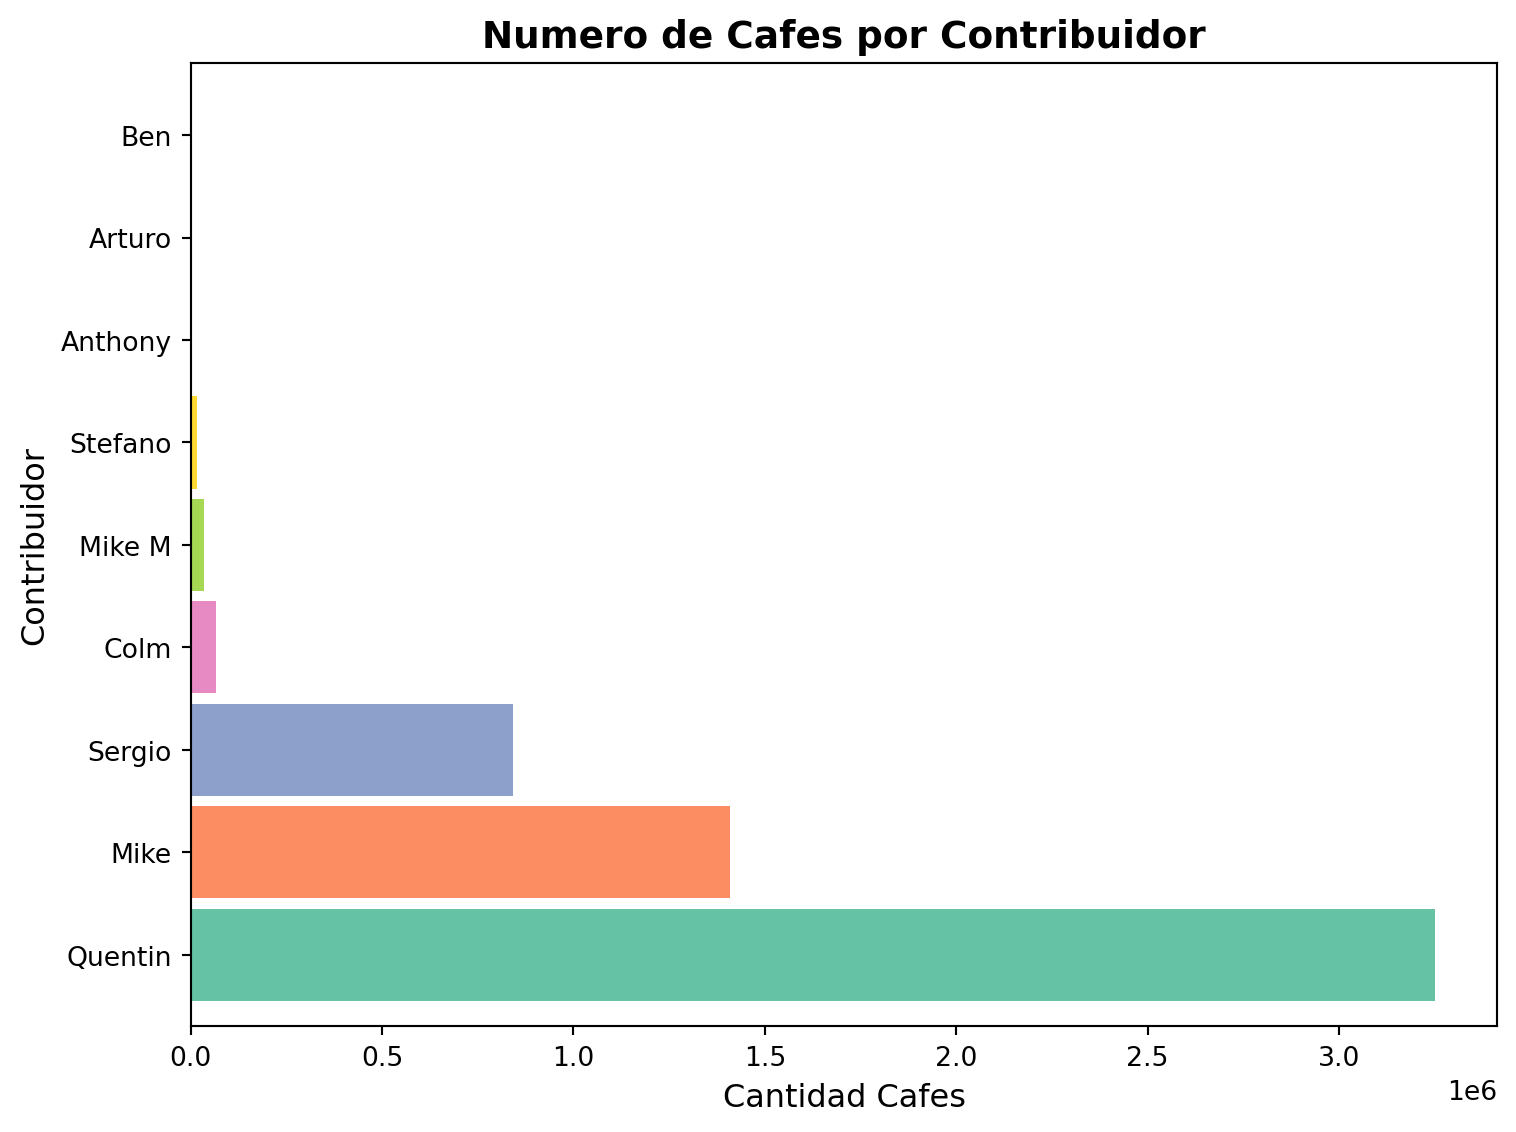

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
#width=0.9 ajusta el ancho de las barras. El valor está en el rango de 0 a 1, donde 1 significa que las barras se tocan entre sí.
ax.set_xlabel("Cantidad de hogares")
ax = df_gr_sorted.plot(kind="barh", width=0.9, x= 'name', y= 'coffee_count' ,legend=False, color=palette, ax=ax)

ax.set_title("Numero de Cafes por Contribuidor", fontsize=14, fontweight='bold')
# Etiqueta del eje X
ax.set_xlabel("Cantidad Cafes", fontsize=12)

# Título del gráfico
ax.set_ylabel("Contribuidor", fontsize=12)


#esto es útil para asegurarse de que las etiquetas, títulos y otros elementos del gráfico no se recorten.
fig.tight_layout()

Vemos que algunas barras no se ven por la diferencia por persona es muy grande. Vamos a ajustar el eje para visualizar las diferencias

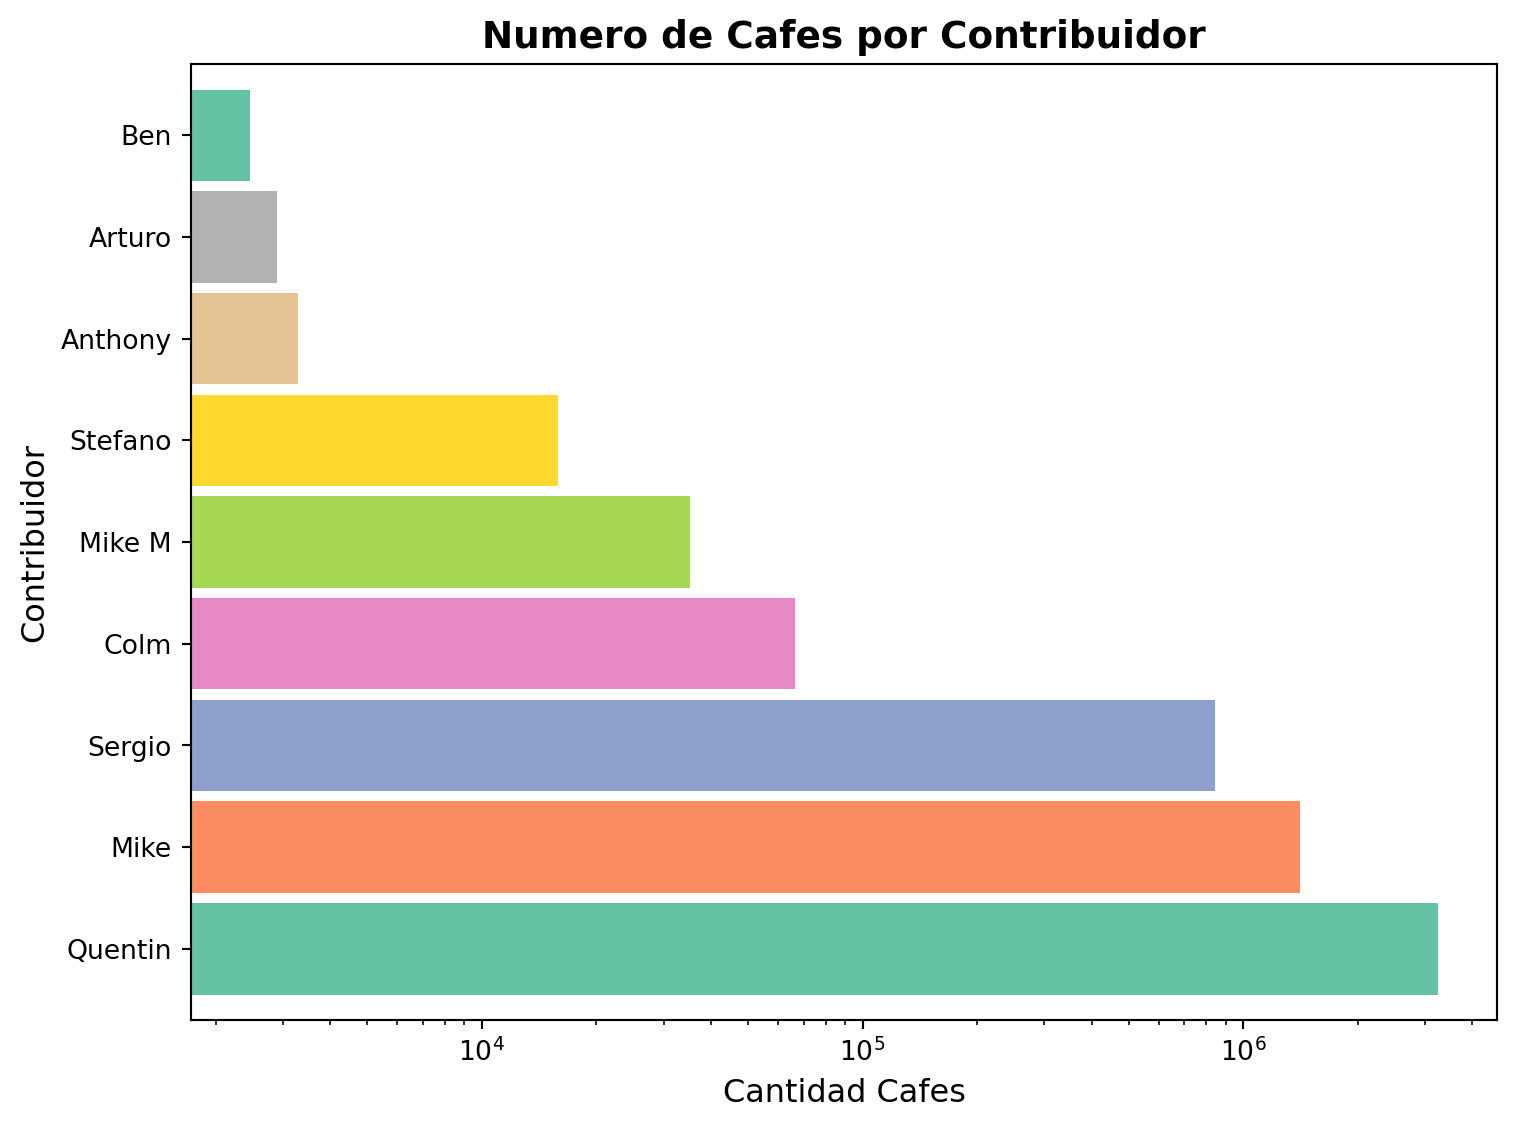

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

#width=0.9 ajusta el ancho de las barras. El valor está en el rango de 0 a 1, donde 1 significa que las barras se tocan entre sí.
ax.set_xlabel("Cantidad de hogares")
ax = df_gr_sorted.plot(kind="barh", width=0.9, x= 'name', y= 'coffee_count' ,legend=False, color=palette, ax=ax)

ax.set_title("Numero de Cafes por Contribuidor", fontsize=14, fontweight='bold')
# Etiqueta del eje X
ax.set_xlabel("Cantidad Cafes", fontsize=12)

# Título del gráfico
ax.set_ylabel("Contribuidor", fontsize=12)

# Ajustar escala del eje x a logarítmica para visualizar mejor los valores dispares
ax.set_xscale('log')

#esto es útil para asegurarse de que las etiquetas, títulos y otros elementos del gráfico no se recorten.
fig.tight_layout()


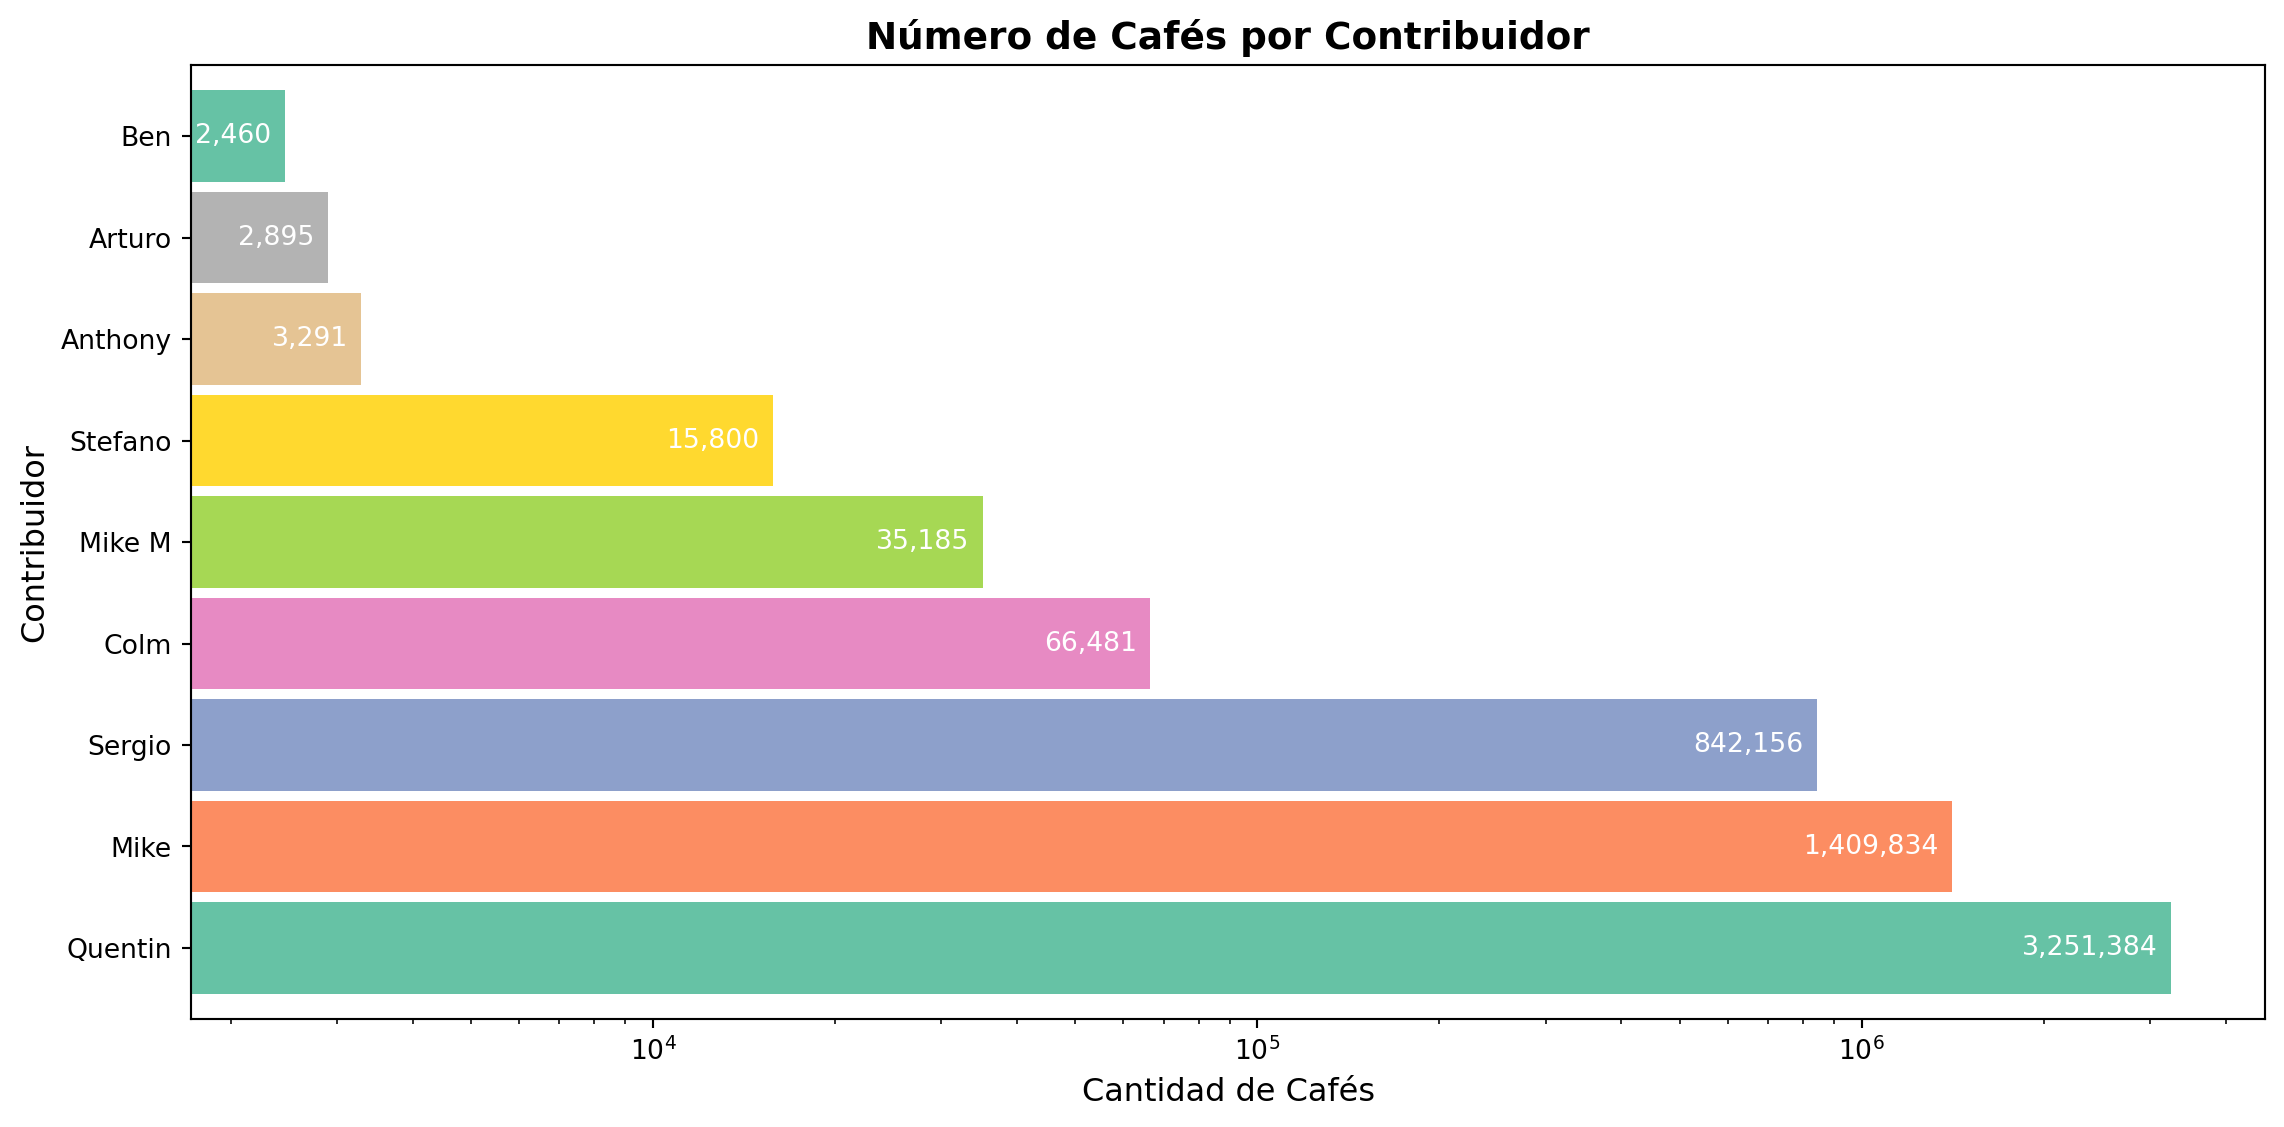

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize=(12,6))

# Crear el gráfico de barras horizontal
ax = df_gr_sorted.plot(kind="barh", width=0.9, x='name', y='coffee_count', legend=False, color=palette, ax=ax)

# Título y etiquetas
ax.set_title("Número de Cafés por Contribuidor", fontsize=14, fontweight='bold')
ax.set_xlabel("Cantidad de Cafés", fontsize=12)
ax.set_ylabel("Contribuidor", fontsize=12)

# Añadir etiquetas con el valor absoluto en cada barra
for index, (name, value) in enumerate(zip(df_gr_sorted['name'], df_gr_sorted['coffee_count'])):
    # Colocar el texto dentro de la barra
    ax.text(value * 0.95, index, f'{value:,.0f}', va='center', ha='right', color='white')

# Ajustar escala del eje x a logarítmica para visualizar mejor los valores dispares
ax.set_xscale('log')

# Asegurar que el layout no recorte contenido
fig.tight_layout()

# Mostrar el gráfico
plt.show()



O puedo crear dos graficos de barras

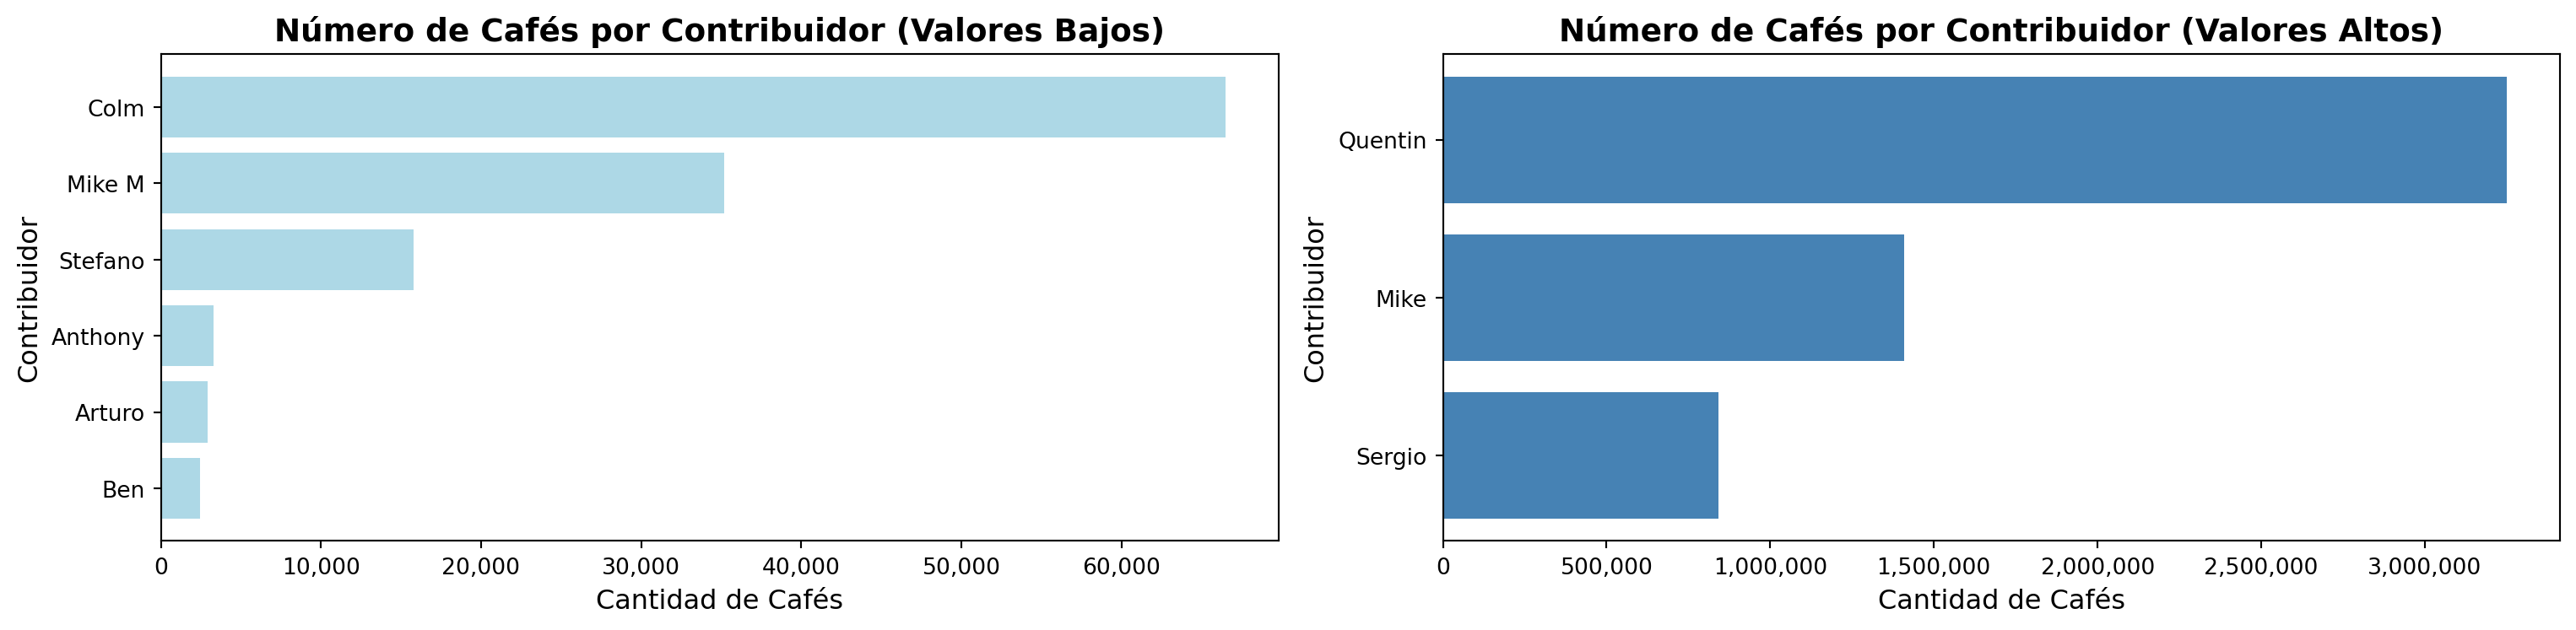

In [16]:
import matplotlib.ticker as ticker

# Definir umbral para dividir los datos
threshold = 100000

# DataFrames para valores altos y bajos
low_values = df_gr_sorted[df_gr_sorted['coffee_count'] < threshold].sort_values('coffee_count', ascending=True)
high_values = df_gr_sorted[df_gr_sorted['coffee_count'] >= threshold].sort_values('coffee_count', ascending=True)

# Crear figura con dos subplots, en una sola fila y dos columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Gráfico para valores bajos
ax1.barh(low_values['name'], low_values['coffee_count'], color='lightblue')
ax1.set_title('Número de Cafés por Contribuidor (Valores Bajos)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de Cafés', fontsize=12)
ax1.set_ylabel('Contribuidor', fontsize=12)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Formato sin notación científica

# Gráfico para valores altos
ax2.barh(high_values['name'], high_values['coffee_count'], color='steelblue')
ax2.set_title('Número de Cafés por Contribuidor (Valores Altos)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Cafés', fontsize=12)
ax2.set_ylabel('Contribuidor', fontsize=12)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Formato sin notación científica

# Ajustar layout para evitar superposición y recortes
fig.tight_layout()

# Mostrar el gráfico
plt.show()



# Parte 2

In [17]:
df_filtered=df_filtered.set_index('timestamp')
df_filtered

,coffees,contributor
timestamp,,
2011-10-03 08:22:00,397.0,Quentin
2011-10-04 11:48:00,410.0,Quentin
2011-10-05 08:25:00,0.0,Quentin
2011-10-05 10:47:00,464.0,Quentin
2011-10-05 13:15:00,481.0,Quentin
...,...,...
2013-03-12 08:28:00,18235.0,Sergio
2013-04-05 11:20:00,18942.0,Sergio
2013-04-27 11:04:00,19698.0,Sergio


In [18]:
df_filtered

,coffees,contributor
timestamp,,
2011-10-03 08:22:00,397.0,Quentin
2011-10-04 11:48:00,410.0,Quentin
2011-10-05 08:25:00,0.0,Quentin
2011-10-05 10:47:00,464.0,Quentin
2011-10-05 13:15:00,481.0,Quentin
...,...,...
2013-03-12 08:28:00,18235.0,Sergio
2013-04-05 11:20:00,18942.0,Sergio
2013-04-27 11:04:00,19698.0,Sergio


In [19]:
# Usar resample junto con un groupby para agrupar por mes y por contribuidor, luego sumar los conteos
monthly_contributor_counts = df_filtered.groupby('contributor').resample('M').sum().drop(columns='contributor').reset_index()
monthly_contributor_counts

,contributor,timestamp,coffees
0,Anthony,2011-10-31,3291.0
1,Arturo,2011-11-30,2895.0
2,Ben,2011-10-31,2460.0
3,Colm,2011-10-31,3109.0
4,Colm,2011-11-30,5997.0
...,...,...,...
71,Sergio,2013-01-31,62505.0
72,Sergio,2013-02-28,50118.0
73,Sergio,2013-03-31,36024.0
74,Sergio,2013-04-30,38640.0


In [20]:
monthly_contributor_counts.groupby('contributor')['coffees'].max().sort_values()

contributor
Ben          2460.0
Arturo       2895.0
Anthony      3291.0
Stefano     15800.0
Colm        17964.0
Mike M      31633.0
Sergio      93988.0
Mike       249775.0
Quentin    468605.0
Name: coffees, dtype: float64

Observamos que el consumo máximo es distinto según la escala. Exploramos graficando el numero de cafes por persona en graficos individuales.

In [21]:
monthly_contributor_counts

,contributor,timestamp,coffees
0,Anthony,2011-10-31,3291.0
1,Arturo,2011-11-30,2895.0
2,Ben,2011-10-31,2460.0
3,Colm,2011-10-31,3109.0
4,Colm,2011-11-30,5997.0
...,...,...,...
71,Sergio,2013-01-31,62505.0
72,Sergio,2013-02-28,50118.0
73,Sergio,2013-03-31,36024.0
74,Sergio,2013-04-30,38640.0


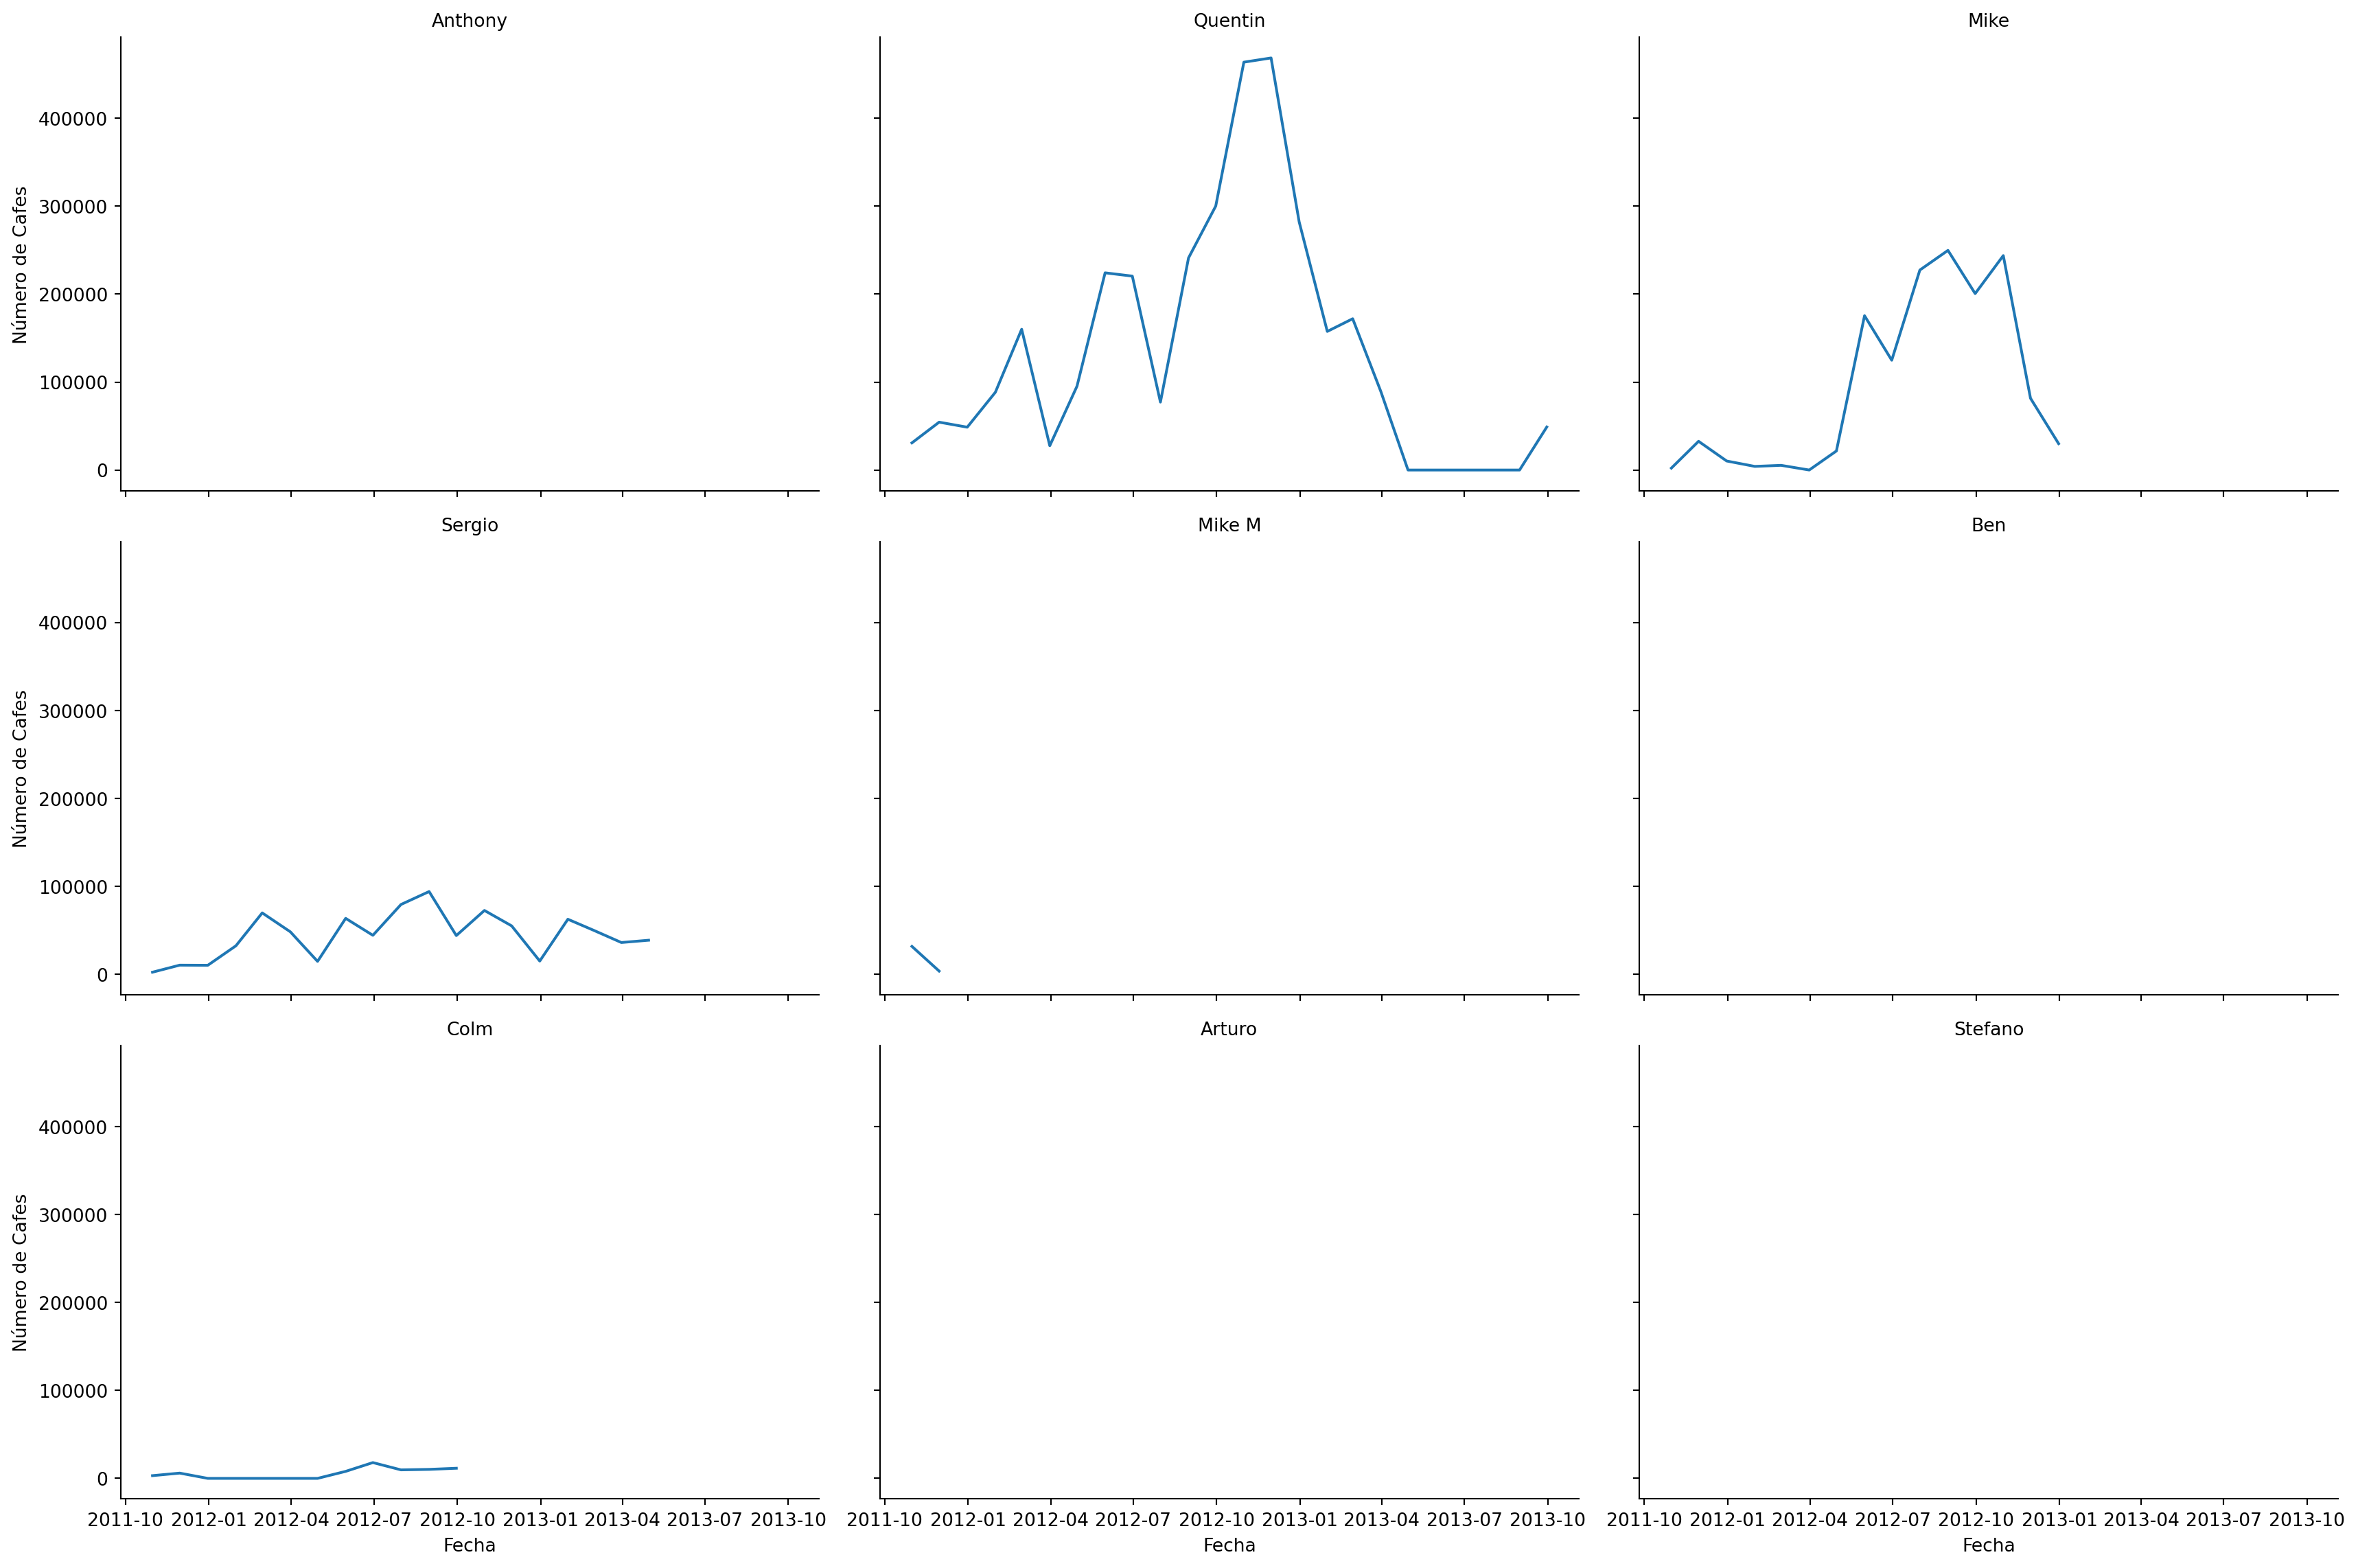

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por 'timestamp'
monthly_contributor_counts.sort_values('timestamp', inplace=True)

# Crear la grilla de gráficos usando FacetGrid
g = sns.FacetGrid(monthly_contributor_counts, col="contributor", col_wrap=3, height=4, aspect=1.5)

# Dibujar los gráficos individuales
g.map_dataframe(sns.lineplot, x="timestamp", y="coffees")

# Configurar el título y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Número de Cafes")

# Ajustar el diseño para mejor visualización
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [23]:
monthly_contributor_counts[monthly_contributor_counts['contributor']=='Anthony']


,contributor,timestamp,coffees
0,Anthony,2011-10-31,3291.0


In [24]:
monthly_contributor_counts[monthly_contributor_counts['contributor']=='Ben']

,contributor,timestamp,coffees
2,Ben,2011-10-31,2460.0


In [25]:
monthly_contributor_counts[monthly_contributor_counts['contributor']=='Arturo']

,contributor,timestamp,coffees
1,Arturo,2011-11-30,2895.0


In [26]:
monthly_contributor_counts[monthly_contributor_counts['contributor']=='Stefano']

,contributor,timestamp,coffees
75,Stefano,2012-05-31,15800.0


Observamos que Anthony, Arturo, Stefano y Ben estuvieron solo un mes por lo que no vale la pena incluirlos en un grafico de lienas mensual. Los vamos a excluir.

<ipython-input-27-9f9c2e139d87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values('timestamp', inplace=True)


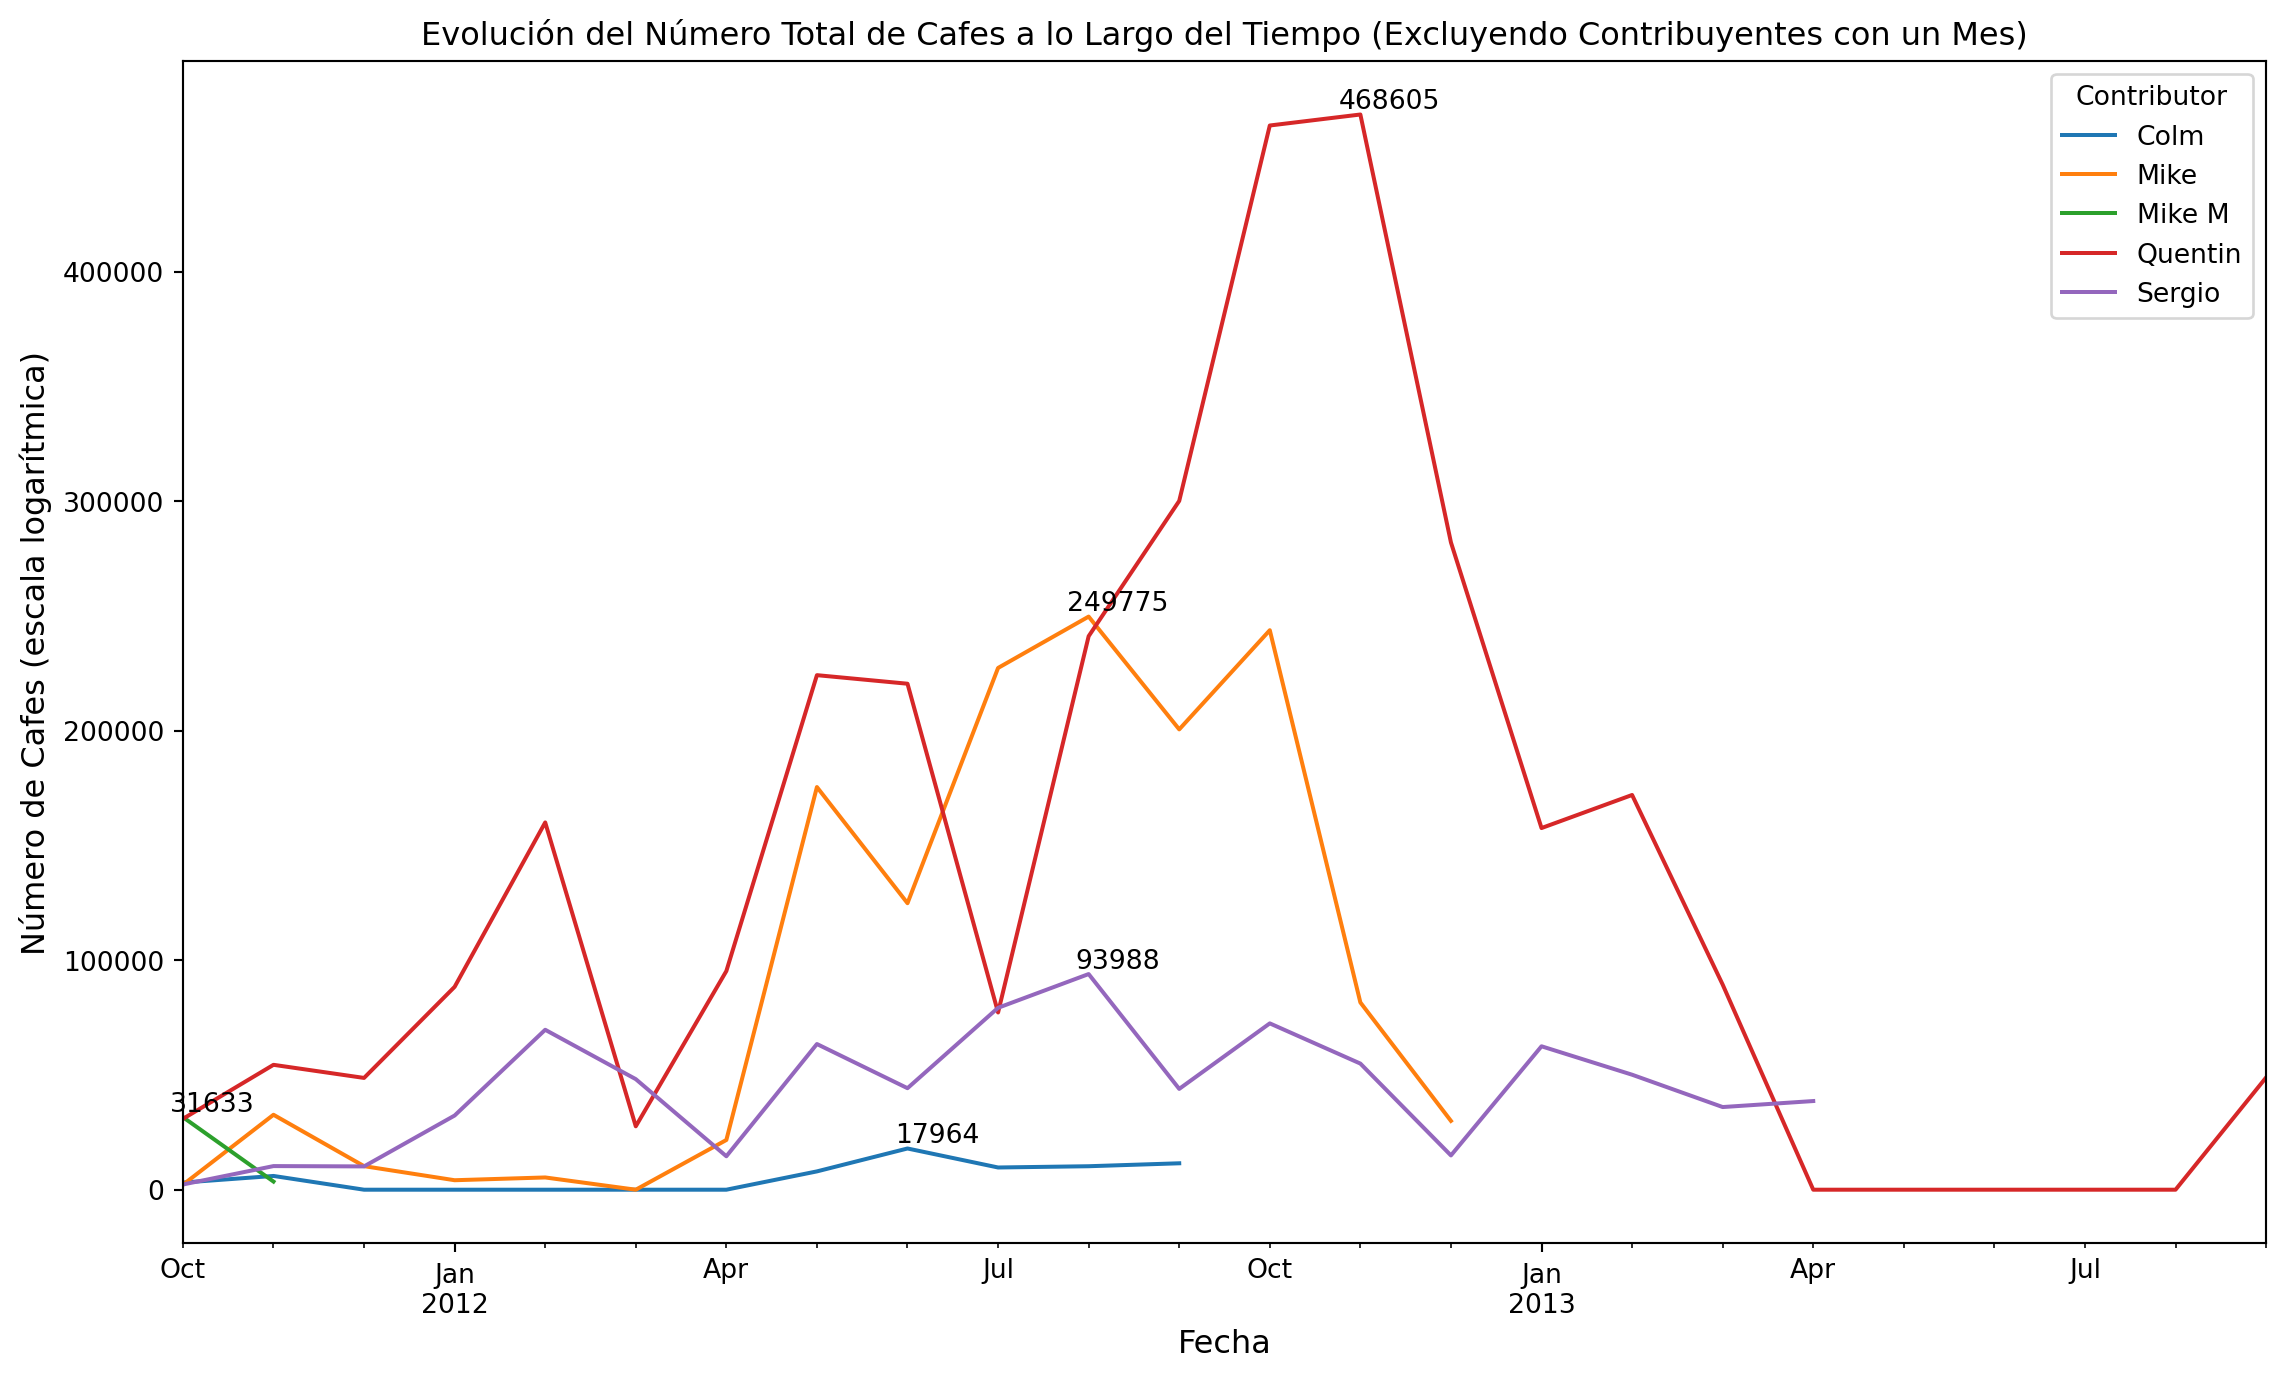

In [27]:
# Excluir a los contribuyentes que estuvieron solo un mes
contributors_to_exclude = ['Anthony', 'Arturo', 'Stefano', 'Ben']
df_filtered = monthly_contributor_counts[~monthly_contributor_counts['contributor'].isin(contributors_to_exclude)]

# Ordenar por 'timestamp'
df_filtered.sort_values('timestamp', inplace=True)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar una línea por cada contribuyente restante
for contributor, group in df_filtered.groupby('contributor'):
    group.plot(x='timestamp', y='coffees', ax=ax, label=contributor)
    # Obtener el valor máximo para el contributor
    max_value = group['coffees'].max()
    max_date = group[group['coffees'] == max_value]['timestamp'].iloc[0]

    # Anotar el máximo
    ax.annotate(f'{max_value:.0f}', xy=(max_date, max_value), xytext=(11, 0),
                textcoords='offset points', ha='center', va='bottom')


# Configurar el título y etiquetas
plt.title('Evolución del Número Total de Cafes a lo Largo del Tiempo (Excluyendo Contribuyentes con un Mes)')
plt.xlabel('Fecha', size=12)
plt.ylabel('Número de Cafes (escala logarítmica)', size=12)

# Mostrar leyenda
plt.legend(title='Contributor')

# Mostrar el gráfico
plt.show()
